                                Machine Learning with 2 feature Banana DataSet

Importing Neccessary Packages and reading the csv file and printing the head of the csv file.

In [12]:
import pandas as pd
import numpy as np
open_file = pd.read_csv("banana.csv",sep=",")
print(open_file.head())
print(open_file.shape)

     At1    At2  Class
0  1.140 -0.114     -1
1 -1.520 -1.150      1
2 -1.050  0.720     -1
3 -0.916  0.397      1
4 -1.090  0.437      1
(5300, 3)


Checking whether any column in the dataset contains NaN values.

In [13]:
print(open_file.isnull().values.any())

False


Computing the Basic Statistics(Descriptive) of the features in the dataset.

In [15]:
print(open_file.describe())

               At1          At2        Class
count  5300.000000  5300.000000  5300.000000
mean      0.000016     0.000018    -0.103396
std       0.999880     1.000038     0.994734
min      -3.090000    -2.390000    -1.000000
25%      -0.753250    -0.914000    -1.000000
50%      -0.015250    -0.037200    -1.000000
75%       0.782000     0.822500     1.000000
max       2.810000     3.190000     1.000000


Now, Using Matplotlib library plotting the two features in the Scatter plot

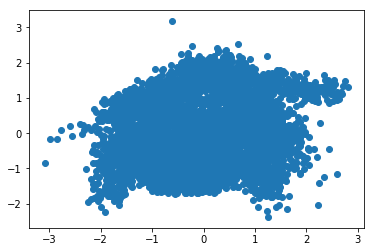

In [18]:
import matplotlib.pyplot as plt
plt.scatter(open_file['At1'],open_file['At2'])
plt.show()

Now, Subsetting the dataset by removing the "Class" feature the from the original dataset.

In [19]:
file = open_file[['At1','At2']]
print(file)

         At1      At2
0     1.1400 -0.11400
1    -1.5200 -1.15000
2    -1.0500  0.72000
3    -0.9160  0.39700
4    -1.0900  0.43700
5    -0.5840  0.09370
6     1.8300  0.45200
7    -1.2500 -0.28600
8     1.7000  1.21000
9    -0.4820 -0.48500
10    1.7900 -0.45900
11   -0.1220 -0.80800
12    0.0809  1.93000
13   -0.5410 -0.33200
14   -1.0200  0.61900
15   -0.7680 -1.04000
16   -1.6900 -0.04610
17    1.2600  1.21000
18    0.7240  0.98900
19    0.4440  1.99000
20   -1.0100 -1.36000
21   -0.8630  0.49600
22    1.1600 -0.45800
23   -0.5950 -0.65100
24   -0.7700  0.36400
25   -0.8710 -0.82500
26    0.9960 -1.70000
27    1.2800  0.69100
28    0.9250  0.89500
29   -0.6870 -1.29000
...      ...      ...
5270  0.8010 -0.63900
5271  0.7620  0.12500
5272  0.0343 -1.18000
5273  0.5240 -0.23100
5274 -0.0262 -1.18000
5275 -1.4700 -0.03580
5276  1.2900  0.15200
5277 -0.8510  0.18900
5278 -0.9610  1.00000
5279 -0.7760  0.12700
5280 -0.6740 -0.62000
5281  0.2440 -0.69000
5282 -0.9740  0.51100
5283  0.37

Now, Plotting the two features in the correlation matrix

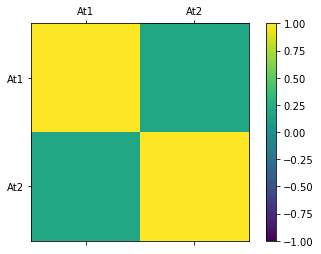

In [32]:
correlation = file.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
names=["At1","At2"]
ticks = np.arange(0,2,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Now using the sklearn library, we import train_test_test from cross validation and split the original dataset into training and test dataset(70,30).

In [34]:
from sklearn.cross_validation import train_test_split
train,test = train_test_split(open_file,test_size=0.3)
features_train = train[['At1','At2']]
features_test = test[['At1','At2']]
labels_train = train.Class
labels_test = test.Class
print(labels_test.head())
print(train.shape)
print(test.shape)

3738   -1
3303    1
346     1
2907   -1
3894   -1
Name: Class, dtype: int64
(3710, 3)
(1590, 3)


Now, we can use our machine learning algorithm to play around with training and test data set. We begin with "Naive Bayes - Gaussian" classifier.

In [36]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 ..., -1  1 -1]
Accuracy: 0.620754716981


Now, Using our second classifier as "Support Vector Machine" with kernel="rbf".

In [48]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 ..., -1  1 -1]
Accuracy: 0.894339622642


"Support Vector Machine" with kernel="linear".

In [47]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1 -1 -1 ..., -1 -1 -1]
Accuracy: 0.577358490566


Now, Using our third classifier as "DecisionTreeClassifier"

In [42]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 ..., -1  1 -1]
Accuracy: 0.876100628931


"Support Vector Machine" with kernel="poly".

In [43]:
from sklearn import svm
clf = svm.SVC(kernel = 'poly')
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 ..., -1  1 -1]
Accuracy: 0.664150943396


Now, Using our fourth classifier as "KNeighborsClassifier"

In [44]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 ..., -1  1 -1]
Accuracy: 0.888679245283


"Support Vector Machine" with kernel="rbf" with C.

In [49]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=10000)
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 ..., -1  1 -1]
Accuracy: 0.891823899371


"Support Vector Machine" with kernel="linear" with C.

In [52]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=1000)
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1 -1 -1 ..., -1 -1 -1]
Accuracy: 0.577358490566


"Support Vector Machine" with kernel="poly" with C.

In [51]:
from sklearn import svm
clf = svm.SVC(kernel = 'poly',C=1000)
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 ..., -1  1 -1]
Accuracy: 0.664150943396


"DecisionTreeClassifier" with min_samples_split.

In [68]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=3)
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 ..., -1  1 -1]
Accuracy: 0.879245283019


"KNeighborsClassifier" with n_neighbors.

In [75]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 ..., -1  1 -1]
Accuracy: 0.890566037736


"AdaBoostClassifier"

In [92]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf = AdaBoostClassifier()
boosted = clf.fit(features_train,labels_train)
prediction = clf.score(features_test,labels_test)
print("Accuracy:",prediction)


Accuracy: 0.727044025157


"GradientBoostingClassifier"

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
boosted = clf.fit(features_train,labels_train)
prediction = clf.score(features_test,labels_test)
print("Accuracy:",prediction)


Accuracy: 0.887421383648


"BaggingClassifier"

In [99]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=100, random_state=7)
boosted = clf.fit(features_train,labels_train)
prediction = clf.score(features_test,labels_test)
print("Accuracy:",prediction)

Accuracy: 0.891823899371


"RandomForestClassifier"

In [102]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=7)
boosted = clf.fit(features_train,labels_train)
prediction = clf.score(features_test,labels_test)
print("Accuracy:",prediction)

Accuracy: 0.891823899371
